<a href="https://colab.research.google.com/github/respwill/Abalone_age_regression/blob/main/Abalone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem state
This project is about prediction for age (ring) of abalone.  
The abalone has rings and when we add 1.5 to this ring, it is the age of the abalone.  
Since the age is floating point, it is regression problem.  
I will use some machine learning models to predict the ring.  

Through this project, I'd like to learn how to fit machine learning model to tabular like data. It includes comparing feature engineering results and selecting models among candidates.  


In [ ]:
pip install ucimlrepo > /dev/null 2>&1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data gathering and Explanation
- Data source - I downloaded the data from below url.  
Url: https://archive.ics.uci.edu/dataset/1/abalone  


- Machine learning problem:  
It is a physical mearsurement of abalone to predict its age.  

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Anomally detection for label


According to domain knowledge, the average age of abalone is around 10 years (8.5 rings).  
It seems data follows the domain knowledge, but there are some outliers in this distribution.  
I'll remove those outlier labels. (Older than 15)    

In [ ]:
X['ring'] = y

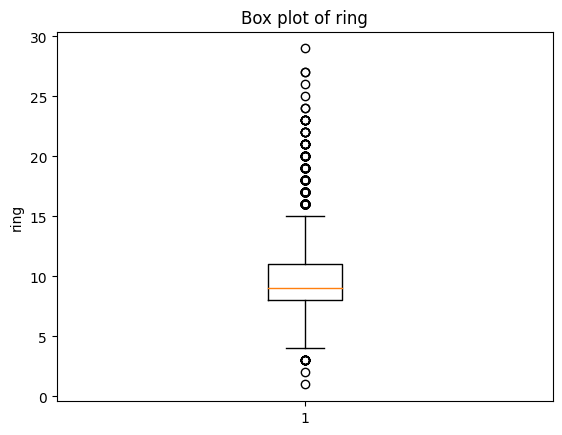

In [ ]:
fig = plt.figure()
plt.boxplot(X['ring'])
plt.ylabel('ring')
plt.title('Box plot of ring')
plt.show()

In [ ]:
X = X[X['ring']<=15]

In [ ]:
X.shape

(3916, 9)

## Basic statistics of features
The number of total records is 3916 and there are 8 features.  
All features has no missing value.  
I can observe that there might be some anomaly since min height is 0 and min shucked_weight is also too small.  

In [ ]:
X['Sex'].notnull().sum()

3916

In [ ]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
count,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000
mean,0.519060,0.403450,0.137256,0.803741,0.353645,0.176191,0.228427,9.381001
std,0.121046,0.099705,0.041655,0.483867,0.223763,0.109211,0.131867,2.418719
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.340000,0.110000,0.419125,0.176375,0.088500,0.122875,8.000000
50%,0.535000,0.420000,0.140000,0.767000,0.327000,0.164250,0.220000,9.000000
75%,0.610000,0.480000,0.165000,1.131125,0.497500,0.247000,0.315000,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,0.797500,15.000000


## Statistical view
It is unusual that Height is 0, even though they are infant records.  
It also seems to be unusual that shucked_weight is only 0.001mg.  
I decided to remove those records.    

In [ ]:
X[X['Height']==0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [ ]:
X[X['Shucked_weight']==0.001]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
236,I,0.075,0.055,0.01,0.002,0.001,0.0005,0.0015,1


In [ ]:
X_r = X[X['Height']!=0]
X_r = X_r[X_r['Shucked_weight']!=0.001]

In [ ]:
X_r.shape

(3913, 9)

In [ ]:
X_r.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,0.519249,0.403600,0.137359,0.804213,0.353848,0.176297,0.228483,9.384360
std,0.120831,0.099543,0.041505,0.483727,0.223715,0.109182,0.131841,2.415225
min,0.110000,0.090000,0.015000,0.008000,0.002500,0.000500,0.003000,2.000000
25%,0.445000,0.340000,0.110000,0.419500,0.176500,0.088500,0.123000,8.000000
50%,0.535000,0.420000,0.140000,0.768000,0.327500,0.164500,0.220000,9.000000
75%,0.610000,0.480000,0.165000,1.131500,0.497500,0.247000,0.315000,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,0.797500,15.000000


In [ ]:
import matplotlib.pyplot as plt

## Length, Diameter, Height vs. Whole_weight
Length, Diameter, and Height are measurement related to size of abalone.  
It is natural that greater size often corresponds to greater weight.  
I will check if there is any datapoint that is out of this trend.  

### Incorrect Weight
Whole weight should be equal to the weight of meat and shell.  
Remove cases that are not like that.  

In [ ]:
op1 = X_r['Whole_weight'] < X_r['Shucked_weight']+X_r['Shell_weight']
X_r[op1].shape

(14, 9)

In [ ]:
X_r[op1]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
193,I,0.355,0.275,0.085,0.2200,0.0920,0.0600,0.1500,8
822,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
1216,I,0.310,0.225,0.070,0.1055,0.4350,0.0150,0.0400,5
1219,I,0.325,0.225,0.075,0.1390,0.0565,0.0320,0.0900,6
1264,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
1302,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,8
1430,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
2127,I,0.400,0.310,0.100,0.1270,0.1060,0.0710,0.0850,7
2627,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5
2641,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7


In [ ]:
X_r = X_r[~op1]

The weight of gut can not be greater than the weight of meat

In [ ]:
op1 = X_r["Shucked_weight"] < X_r["Viscera_weight"]
X_r[op1].shape

(3, 9)

In [ ]:
X_r[op1]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
323,I,0.265,0.205,0.070,0.1055,0.039,0.0410,0.0350,5
2114,I,0.130,0.095,0.035,0.0105,0.005,0.0065,0.0035,4
2240,M,0.415,0.315,0.125,0.3880,0.068,0.0900,0.1250,12


In [ ]:
X_r = X_r[~op1]

In [ ]:
X_r.shape

(3896, 9)

Sum of decomposed weight should be equal or less than whole weight.  

In [ ]:
op1 = X_r['Whole_weight'] < X_r['Shucked_weight']+X_r['Viscera_weight']+X_r['Shell_weight']
X_r[op1].shape

(135, 9)

In [ ]:
X_r = X_r[~op1]

In [ ]:
X_r.shape

(3761, 9)

### Height and Weight
Height and whole_weight has positive relationship.  
I can observe 3 data points that are out of trend.  
I'll remove them from dataset.  

Text(0, 0.5, 'Whole_weight')

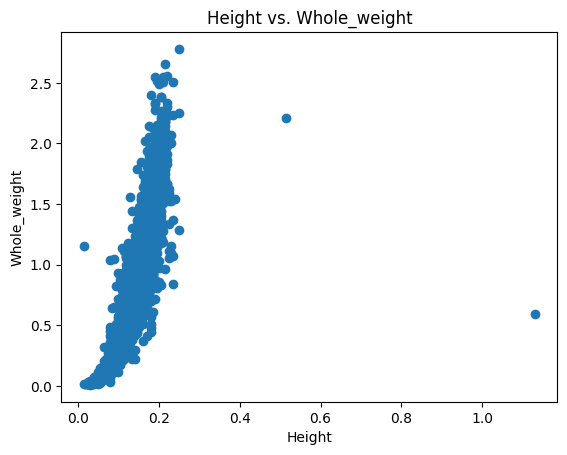

In [ ]:
subset = X_r.sort_values(by='Height')
x_label = 'Height'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [ ]:
X_r[X_r['Height'].between(0.4, 2.0)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [ ]:
op1 = X_r['Height']<0.02
op2 = X_r['Whole_weight']>1.0
X_r[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.308,0.2885,9


In [ ]:
X_r2 = X_r[~X_r['Height'].between(0.4, 2.0)]
X_r2 = X_r2[~(op1&op2)]
X_r2.shape

<ipython-input-29-1a8a1e87ddfe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_r2 = X_r2[~(op1&op2)]


(3758, 9)

### Diameter and weight
diameter and weight seems to be aligned well.  

Text(0, 0.5, 'Whole_weight')

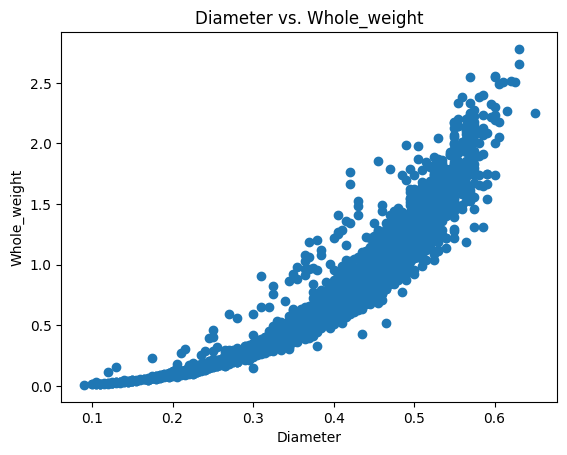

In [ ]:
subset = X_r2.sort_values(by='Diameter')
x_label = 'Diameter'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Length and weight
I can observe one data point seems to be an outlier.  

Text(0, 0.5, 'Whole_weight')

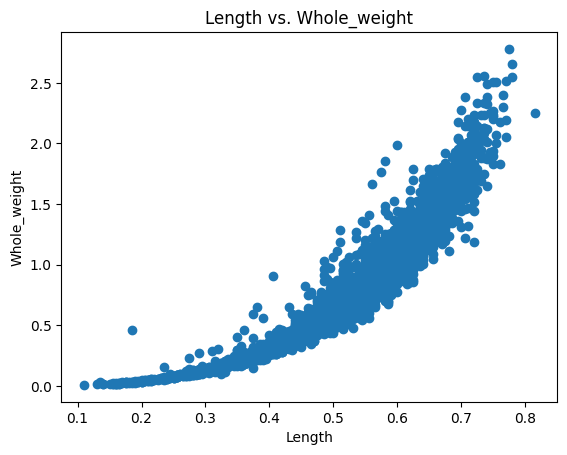

In [ ]:
subset = X_r2.sort_values(by='Length')
x_label = 'Length'
y_label = 'Whole_weight'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [ ]:
op1 = X_r2['Length']<0.2
op2 = X_r2['Whole_weight']>0.4
X_r2[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
1210,I,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15,6


In [ ]:
X_r3 = X_r2[~(op1&op2)]
X_r3.shape

(3757, 9)

## Length vs. Height vs. Diameter

### Length vs. Height
Strong postive relationship can be observed between Length and Height.  
Three out of them seems to be outliers.    


Text(0, 0.5, 'Height')

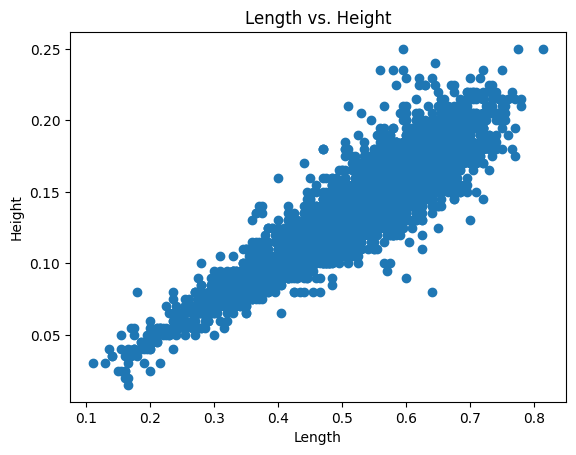

In [ ]:
subset = X_r3.sort_values(by='Length')
x_label = 'Length'
y_label = 'Height'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [ ]:
op1 = X_r3['Length']<0.2
op2 = X_r3['Height']>0.07
X_r3[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
3141,I,0.18,0.135,0.08,0.033,0.0145,0.007,0.01,5


In [ ]:
X_r4 = X_r3[~(op1 & op2)]
X_r4.shape

(3756, 9)

In [ ]:
op1 = X_r4['Length']>0.6
op2 = X_r4['Height']<0.1
X_r4[(op1&op2)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
2801,M,0.64,0.515,0.08,1.042,0.515,0.1755,0.175,10


In [ ]:
X_r4 = X_r4[~(op1 & op2)]
X_r4.shape

(3755, 9)

Text(0, 0.5, 'Height')

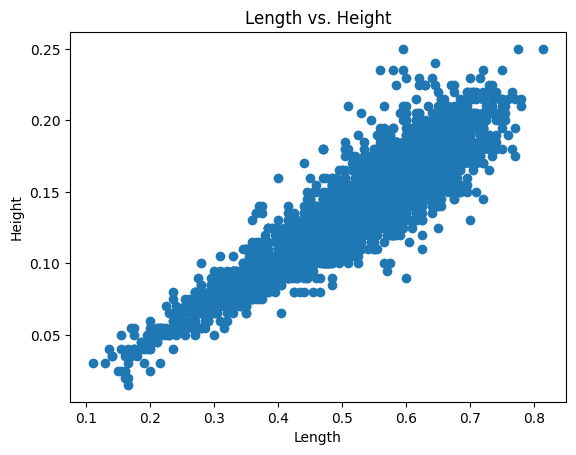

In [ ]:
subset = X_r4.sort_values(by='Length')
x_label = 'Length'
y_label = 'Height'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Length vs. Diameter
Length and Diagram have strong positive relationship too.  
One datapoint seems to be out of trend.  

Text(0, 0.5, 'Diameter')

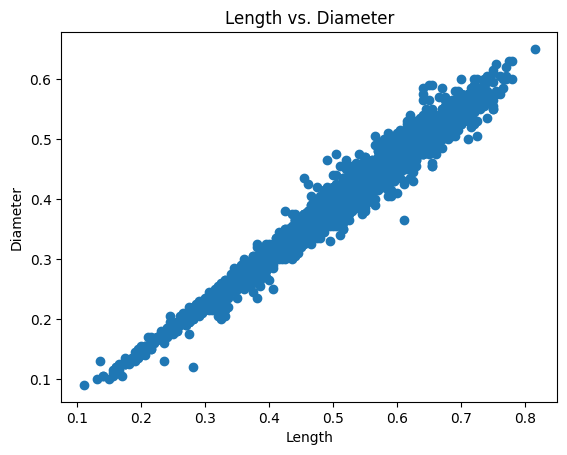

In [ ]:
subset = X_r4.sort_values(by='Length')
x_label = 'Length'
y_label = 'Diameter'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [ ]:
op1 = X_r4['Length']>0.25
op2 = X_r4['Diameter']<0.15
X_r4[op1 & op2]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,ring
898,I,0.28,0.12,0.075,0.117,0.0455,0.029,0.0345,4


In [ ]:
X_r4 = X_r4[~(op1 & op2)]
X_r4.shape

(3754, 9)

Text(0, 0.5, 'Diameter')

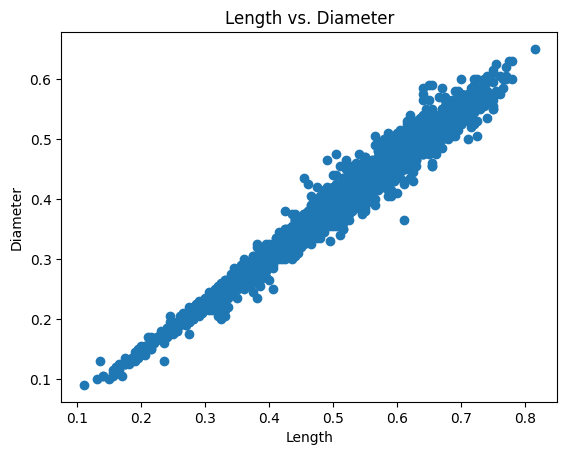

In [ ]:
subset = X_r4.sort_values(by='Length')
x_label = 'Length'
y_label = 'Diameter'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

### Height vs. Diameter

Text(0, 0.5, 'Diameter')

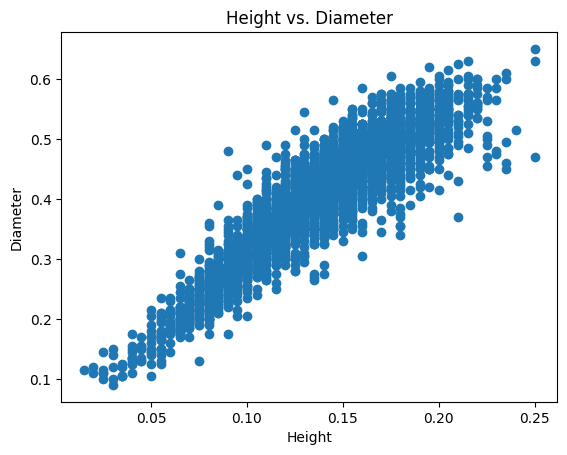

In [ ]:
subset = X_r4.sort_values(by='Height')
x_label = 'Height'
y_label = 'Diameter'
plt.scatter(subset[x_label], subset[y_label])
plt.title(f'{x_label} vs. {y_label}')
plt.xlabel(x_label)
plt.ylabel(y_label)

## Add features
I can observe that the mean value of features by age is related to ring (age) when ring is less than 10.  
The features would be helpful to predict rings for abalone that is younger than 11.5 (10 rings), but older one.  
So it is crucial to find out features that is related to ring bigger than 10.

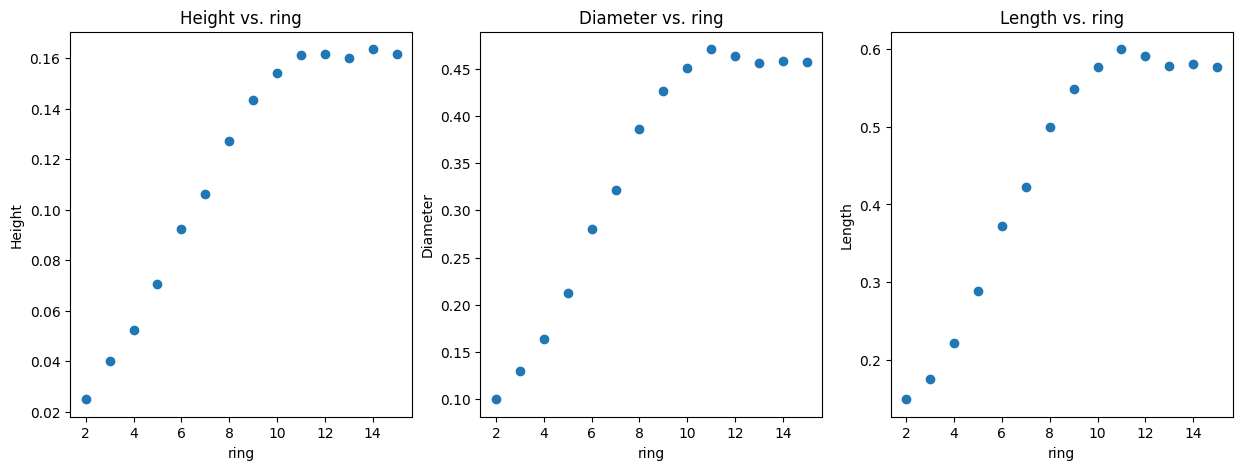

In [ ]:
feature_mean_ring = X_r4[['ring','Height','Diameter','Length']].groupby(by='ring').mean()
fig, axs = plt.subplots(1,3, figsize=(15,5))
for idx, c in enumerate(['Height', 'Diameter', 'Length']):
    subset = feature_mean_ring.reset_index()
    x_label = 'ring'
    y_label = c
    axs[idx].scatter(subset[x_label], subset[y_label])
    axs[idx].set_title(f"{c} vs. ring")
    axs[idx].set_xlabel(x_label)
    axs[idx].set_ylabel(y_label)

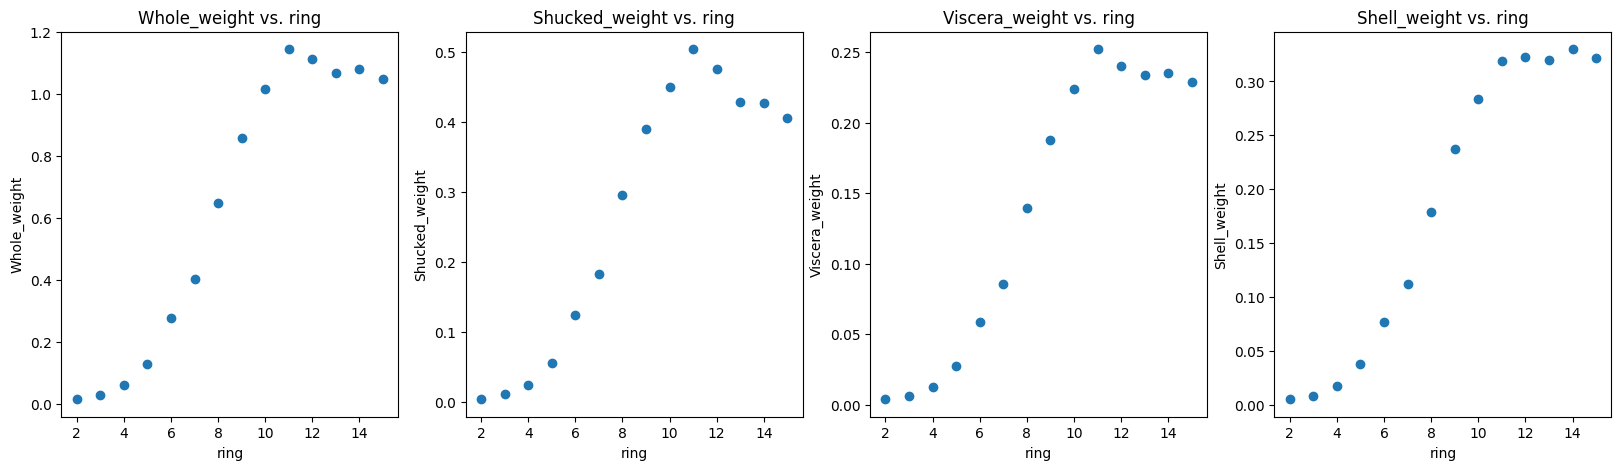

In [ ]:
feature_mean_ring = X_r4[['ring', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']].groupby(by='ring').mean()
fig, axs = plt.subplots(1,4, figsize=(20,5))
for idx, c in enumerate(['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']):
    subset = feature_mean_ring.reset_index()
    x_label = 'ring'
    y_label = c
    axs[idx].scatter(subset[x_label], subset[y_label])
    axs[idx].set_title(f"{c} vs. ring")
    axs[idx].set_xlabel(x_label)
    axs[idx].set_ylabel(y_label)

I added some features:
The ratio shows comparison between feature and average value of each age.  
I thought it would show relative position of each object.  

In [ ]:
for c in ['Height', 'Diameter', 'Length']:
    average_feat = X_r4.groupby('ring')[c].mean().to_dict()
    for age in average_feat:
        X_r4[f'{c}_to_avg_{c}_age_{age}'] = X_r4[c] / average_feat[age]

In [ ]:
X_r4.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'ring', 'Height_to_avg_Height_age_2',
       'Height_to_avg_Height_age_3', 'Height_to_avg_Height_age_4',
       'Height_to_avg_Height_age_5', 'Height_to_avg_Height_age_6',
       'Height_to_avg_Height_age_7', 'Height_to_avg_Height_age_8',
       'Height_to_avg_Height_age_9', 'Height_to_avg_Height_age_10',
       'Height_to_avg_Height_age_11', 'Height_to_avg_Height_age_12',
       'Height_to_avg_Height_age_13', 'Height_to_avg_Height_age_14',
       'Height_to_avg_Height_age_15', 'Diameter_to_avg_Diameter_age_2',
       'Diameter_to_avg_Diameter_age_3', 'Diameter_to_avg_Diameter_age_4',
       'Diameter_to_avg_Diameter_age_5', 'Diameter_to_avg_Diameter_age_6',
       'Diameter_to_avg_Diameter_age_7', 'Diameter_to_avg_Diameter_age_8',
       'Diameter_to_avg_Diameter_age_9', 'Diameter_to_avg_Diameter_age_10',
       'Diameter_to_avg_Diameter_age_11', 'Diameter_to_avg_Di

In [ ]:
X_r4.shape

(3754, 51)

## Sex
There are three kinds of sex in this dataset: Male, Female, and Infant.  
The number of each sex is descending with next order: Male, Infant, and Female.  


In [ ]:
X_r4['Sex'].value_counts()

Sex
M    1370
I    1229
F    1155
Name: count, dtype: int64

From boxplot, It appears that Sex value is not that accurate from perspective of age.  Some Infant data is older than Female or Male, and some Female and Male are younger than Infant.

In [ ]:
X_r4['age'] = X_r4['ring']+1.5

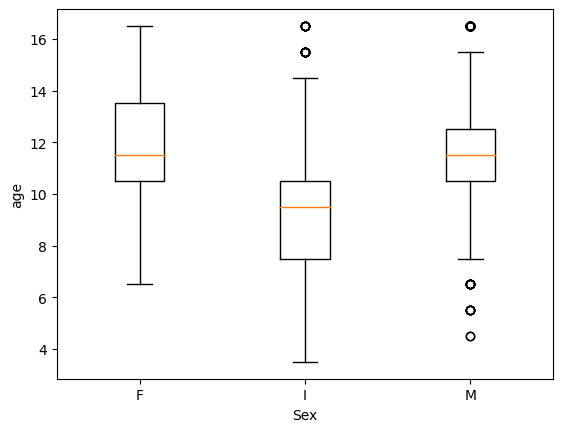

In [ ]:
plt.figure()
sex_group = X_r4[['Sex','age']].groupby(by='Sex')['age'].apply(list)
plt.boxplot(sex_group, labels=sex_group.index)
plt.xlabel('Sex')
plt.ylabel('age')
plt.show();

In [ ]:
X_r4['A_I'] = X_r4['Sex'].apply(lambda x: 'A' if x in ['F','M'] else 'I')

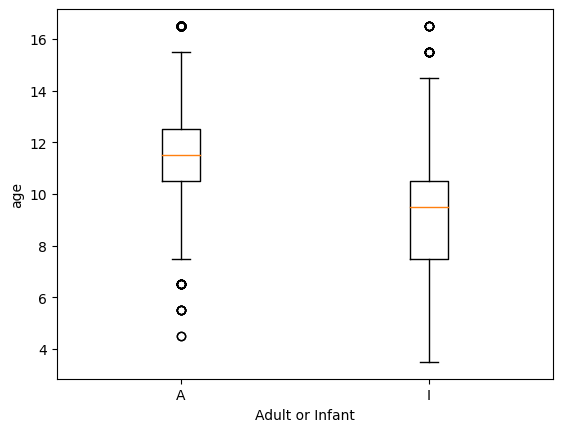

In [ ]:
plt.figure()
sex_group = X_r4[['A_I','age']].groupby(by='A_I')['age'].apply(list)
plt.boxplot(sex_group, labels=sex_group.index)
plt.xlabel('Adult or Infant')
plt.ylabel('age')
plt.show();

In [ ]:
# Create a color dictionary
color_dict = {'M': 'blue', 'F': 'red', 'I': 'green'}

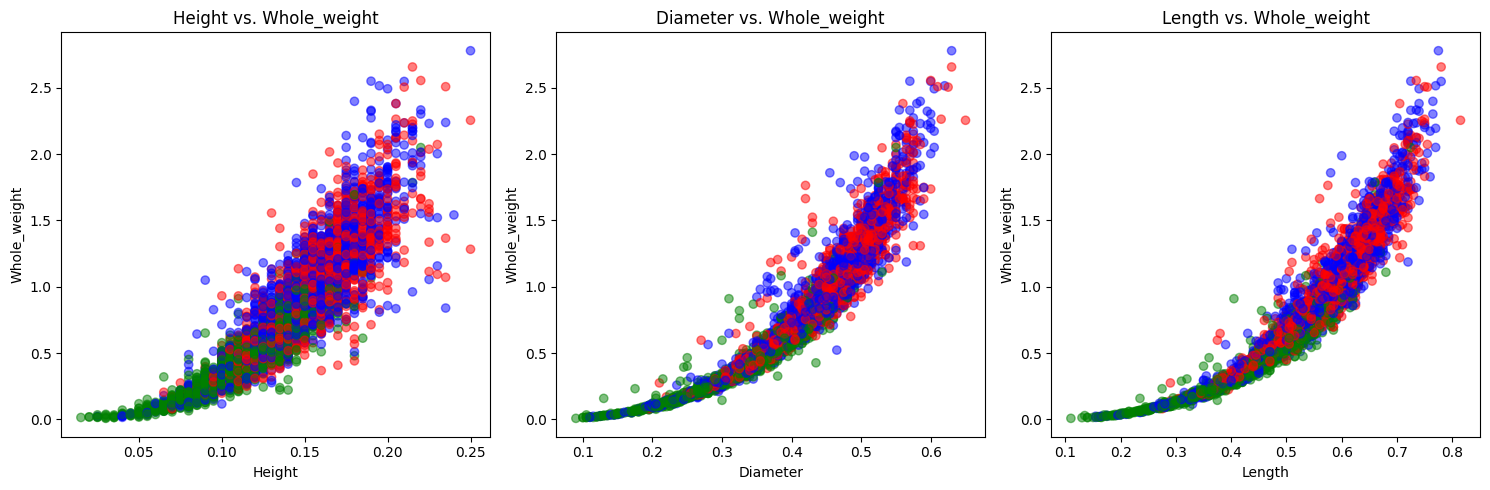

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for idx, c in enumerate(['Height', 'Diameter', 'Length']):
    subset = X_r4.sort_values(by='Height')
    x_label = c
    y_label = 'Whole_weight'
    # Map colors to the ColorCategory column
    colors = subset['Sex'].map(color_dict)
    axs[idx].scatter(subset[x_label], subset[y_label], c=colors, alpha=0.5)
    axs[idx].set_title(f'{x_label} vs. {y_label}')
    axs[idx].set_xlabel(x_label)
    axs[idx].set_ylabel(y_label)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

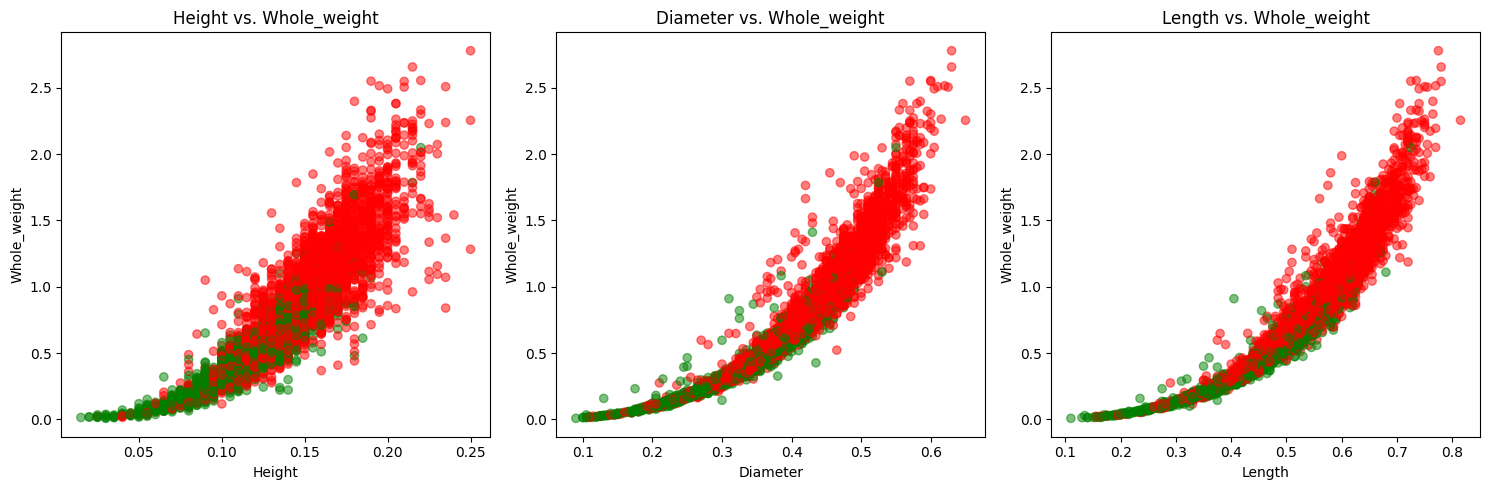

In [ ]:
color_dict = {'A': 'red', 'I': 'green'}
fig, axs = plt.subplots(1,3, figsize=(15,5))
for idx, c in enumerate(['Height', 'Diameter', 'Length']):
    subset = X_r4.sort_values(by='Height')
    x_label = c
    y_label = 'Whole_weight'
    # Map colors to the ColorCategory column
    colors = subset['A_I'].map(color_dict)
    axs[idx].scatter(subset[x_label], subset[y_label], c=colors, alpha=0.5)
    axs[idx].set_title(f'{x_label} vs. {y_label}')
    axs[idx].set_xlabel(x_label)
    axs[idx].set_ylabel(y_label)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Check if Sex is associated with Age.  
The value of Sex feature is Male, Female, and Infant.  
To think intuitively Male and Female would have little difference in age and Infant would be younger than both Male and Female.  
But according to below visulization, data is different from ituition.  
Therefore, Sex should be editted to align with label (age).  

In [ ]:
from matplotlib.lines import Line2D

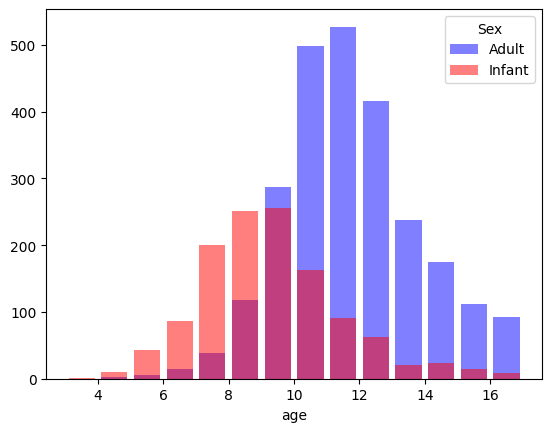

In [ ]:
sorted_age = X_r4.sort_values(by='age')
sorted_age = pd.pivot_table(sorted_age, index='age', columns='A_I', aggfunc='count')
plt.bar(sorted_age.index, sorted_age[('ring','A')], color='blue', alpha=0.5, label='Adult')
plt.bar(sorted_age.index, sorted_age[('ring','I')], color='red', alpha=0.5, label='Infant')
plt.xlabel('age')
plt.legend(title="Sex")

In [ ]:
A_I_dummy = pd.get_dummies(X_r4['A_I'])
X_r4 = pd.concat([X_r4, A_I_dummy], axis=1)

## Engineered features  
The new features can be created by transformation and some aggregation.  
It is hard to perform check all possible combination, I will use featuretools package to automate this feature engineering process.  

In [ ]:
!pip install featuretools

In [ ]:
import featuretools as ft
from featuretools.selection import (
    remove_highly_correlated_features,
    remove_highly_null_features,
    remove_single_value_features,
)
from featuretools.primitives import TransformPrimitive
from woodwork.column_schema import ColumnSchema
# from featuretools.utils.gen_utils import Library
import numpy as np

In [ ]:
es = ft.EntitySet(id='data')
es = es.add_dataframe(dataframe_name='df', dataframe=X_r4, index='id')

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/loc

There are many options for transformation and aggregation.  


In [ ]:
from featuretools.primitives import Sum, Median, Skew, NumUnique, Mode, Absolute

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
ft.primitives.list_primitives().sort_values(by='name').head(10)

,name,type,description,valid_inputs,return_type
91,absolute,transform,Computes the absolute value of a number.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
72,absolute_diff,transform,Calculates the absolute difference from the pr...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
80,add_numeric,transform,Performs element-wise addition of two lists.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
99,add_numeric_scalar,transform,Adds a scalar to each value in the list.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
174,age,transform,Calculates the age in years as a floating poin...,<ColumnSchema (Logical Type = Datetime) (Seman...,<ColumnSchema (Logical Type = AgeFractional) (...
47,all,aggregation,Calculates if all values are 'True' in a list.,"<ColumnSchema (Logical Type = Boolean)>, <Colu...",<ColumnSchema (Logical Type = Boolean)>
137,and,transform,Performs element-wise logical AND of two lists.,"<ColumnSchema (Logical Type = Boolean)>, <Colu...",<ColumnSchema (Logical Type = BooleanNullable)>
52,any,aggregation,Determines if any value is 'True' in a list.,"<ColumnSchema (Logical Type = Boolean)>, <Colu...",<ColumnSchema (Logical Type = Boolean)>
23,average_count_per_unique,aggregation,Determines the average count across all unique...,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Logical Type = Double) (Semanti...
2,avg_time_between,aggregation,Computes the average number of seconds between...,<ColumnSchema (Logical Type = Datetime) (Seman...,<ColumnSchema (Logical Type = Double) (Semanti...


In [ ]:
# # Height_to_avg_Height_age_4
# ignore_columns = []
# for c in ['Height', 'Diameter', 'Length']:
#     for n in range(2,16):
#         ignore_columns.append(f"{c}_to_avg_{c}_age_{n}")

I choosed options as below.  

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name='df',
                                      agg_primitives=['sum', "mean", "max", "min", "std", "skew", "mode", "median", "std","skew", "count"],
                                    #   trans_primitives=['DivideNumeric', 'AddNumeric', 'MultiplyNumeric', 'SubtractNumeric', log_primitive],
                                      trans_primitives=[ 'natural_logarithm', 'negate', 'subtract_numeric', 'add_numeric', 'square_root', 'multiply_numeric', 'divide_numeric', 'exponential_weighted_average'],
                                    #   ignore_columns={'df': ['ring','age']+ignore_columns},
                                      ignore_columns={'df': ['ring','age']},
                                      max_depth=2)

feature_matrix.head(2)

/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count', 'max', 'mean', 'median', 'min', 'mode', 'skew', 'std', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Height_to_avg_Height_age_2,Height_to_avg_Height_age_3,...,Length_to_avg_Length_age_9 - Shell_weight,Length_to_avg_Length_age_9 - Shucked_weight,Length_to_avg_Length_age_9 - Viscera_weight,Length_to_avg_Length_age_9 - Whole_weight,Shell_weight - Shucked_weight,Shell_weight - Viscera_weight,Shell_weight - Whole_weight,Shucked_weight - Viscera_weight,Shucked_weight - Whole_weight,Viscera_weight - Whole_weight
id,,,,,,,,,,,,,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,3.8,2.375,...,0.679898,0.605398,0.728898,0.315898,-0.0745,0.0490,-0.3640,0.1235,-0.2895,-0.413
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,3.6,2.250,...,0.568383,0.538883,0.589883,0.412883,-0.0295,0.0215,-0.1555,0.0510,-0.1260,-0.177


Add labels to save this dataset as one tabular table.  
Also I removed higly correlated features to prevent collinearity between features.  

In [ ]:
feature_matrix, feature_defs = remove_highly_correlated_features(feature_matrix, features=feature_defs)
feature_matrix['ring'] = X_r4['ring']
feature_matrix['age'] = X_r4['age']
print(feature_matrix.shape, feature_matrix.columns)

(3754, 440) Index(['Sex', 'Length', 'Height', 'Whole_weight', 'A_I', 'A',
       'Diameter / Diameter_to_avg_Diameter_age_10',
       'Diameter / Diameter_to_avg_Diameter_age_11',
       'Diameter / Diameter_to_avg_Diameter_age_14',
       'Diameter / Diameter_to_avg_Diameter_age_2',
       ...
       'Length - Shell_weight', 'Length - Viscera_weight',
       'Length_to_avg_Length_age_10 - Shell_weight',
       'Length_to_avg_Length_age_10 - Shucked_weight',
       'Length_to_avg_Length_age_4 - Whole_weight',
       'Length_to_avg_Length_age_5 - Whole_weight',
       'Shell_weight - Shucked_weight', 'Shell_weight - Viscera_weight',
       'ring', 'age'],
      dtype='object', length=440)


In [ ]:
# feature_matrix_r = pd.concat([feature_matrix, X_r4[ignore_columns]], axis=1)

In [ ]:
feature_matrix.head()

,Sex,Length,Height,Whole_weight,A_I,A,Diameter / Diameter_to_avg_Diameter_age_10,Diameter / Diameter_to_avg_Diameter_age_11,Diameter / Diameter_to_avg_Diameter_age_14,Diameter / Diameter_to_avg_Diameter_age_2,...,Length - Shell_weight,Length - Viscera_weight,Length_to_avg_Length_age_10 - Shell_weight,Length_to_avg_Length_age_10 - Shucked_weight,Length_to_avg_Length_age_4 - Whole_weight,Length_to_avg_Length_age_5 - Whole_weight,Shell_weight - Shucked_weight,Shell_weight - Viscera_weight,ring,age
id,,,,,,,,,,,,,,,,,,,,,
0,M,0.455,0.095,0.5140,A,True,0.450202,0.470481,0.458294,0.1,...,0.305,0.3540,0.640115,0.565615,1.530475,1.063313,-0.0745,0.0490,15,16.5
1,M,0.350,0.090,0.2255,A,True,0.450202,0.470481,0.458294,0.1,...,0.280,0.3015,0.537781,0.508281,1.347173,0.987817,-0.0295,0.0215,7,8.5
2,F,0.530,0.135,0.6770,A,True,0.450202,0.470481,0.458294,0.1,...,0.320,0.3885,0.710353,0.663853,1.704476,1.160309,-0.0465,0.0685,9,10.5
3,M,0.440,0.125,0.5160,A,True,0.450202,0.470481,0.458294,0.1,...,0.285,0.3260,0.609067,0.548567,1.461075,1.009313,-0.0605,0.0410,10,11.5
4,I,0.330,0.080,0.2050,I,False,0.450202,0.470481,0.458294,0.1,...,0.275,0.2905,0.518050,0.483550,1.277806,0.938985,-0.0345,0.0155,7,8.5


# Save
Let's save data

In [ ]:
feature_matrix.to_pickle("preprocessed_abalone3.pickle")